In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

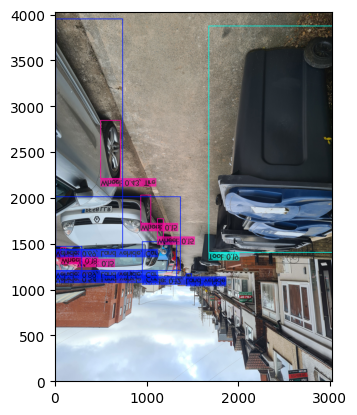

In [7]:


img = mpimg.imread('./predictions.jpg')

imgplot = plt.imshow(img)
plt.gca().invert_yaxis()

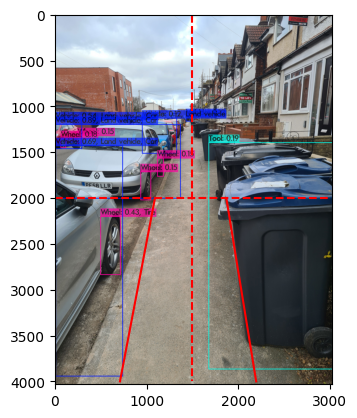

In [8]:
left_1 = [800-90,4000]
left_2 = [1141.91767-50,2000]
right_1 = [2285.89905-90,4000]
right_2 = [1920.03521-50,2000]
center = [1500, 4000]
left_x = [left_1[0], left_2[0]]
left_y = [left_1[1], left_2[1]]
right_x = [right_1[0], right_2[0]]
right_y = [right_1[1], right_2[1]]
dist_200 = [[0,3000], [2000,2000]]
center = [[1500,1500], [0,4000]]
plt.plot(left_x, left_y,color='red')
plt.plot( right_x, right_y, color='red')
plt.plot(dist_200[0], dist_200[1], '--r')
plt.plot(center[0], center[1], '--r')
# plt.plot(right_1,right_2, color='black', linewidth=2)
plt.imshow(img)
plt.show()


In [67]:
# right_line_funct: y = 6.14x - 9477.4
# right_line_funct: x = (y + 9477.4)/6.14
# left_line_funct: y = -5.24x + 7718.08
# left_line_funct: x = (y - 7718.08)/-5.24

In [82]:
# Evaluate x position with Left Line
# x = left most coordinate
# y = lowest coordinate
def evaluate_leftLine(x, y):
    # plug in y position to the function to find the correspond x coordinate:
    func_x = (y - 7718.08)/-5.24
    if x < func_x:
        # Return ... if object position is on the left side of left line
        return False
    else:
        # Return ... if object position is on the right side of left line
        #  Which means that the object is inside the walking path
        return True

In [69]:
def evaluate_rightline(x, y):
    # plug in y position to the function to find the correspond x coordinate:
    func_x = (y + 9477.4)/6.14
    if x > func_x:
        # Return ... if object position is on the right side of right line
        return False
    else:
        # Return ... if object position is on the left side of right line
        #  Which means that the object is inside the walking path
        return True

In [70]:
def evaluate_distance(y):
    if y < dist_200[1][0]:
        return False
    else:
        return True

In [71]:
def evaluate_side(x_left, x_right, y_bottom):
    center_line = center[0][0]
    print("x_left, x_right, y_bottom: ", x_left, x_right, y_bottom)
    # object is on the center:
    if x_left <= center_line <= x_right:
        return "Object located in the center"
    # object is on the left side:
    if x_right < center_line or x_left < center_line:
        print("checking left")
        if evaluate_leftLine(x_right, y_bottom):
            return "Left line violated"
        return None
    # object is on the right side:
    if x_left > center_line or x_right > center_line:
        print("checking right")
        if evaluate_rightline(x_left, y_bottom):
            return "Right line violated"
        return None




In [72]:
# Ful evaluation process
def evaluate_object_location(x_left, x_right, y_bottom):
    check = evaluate_distance(y_bottom)
    if check:
        return evaluate_side(x_left, x_right, y_bottom)
    else:
        return None

In [75]:
import re

pattern = "\(left_x:\s+(\d+)\s+top_y:\s+(\d+)\s+width:\s+(\d+)\s+height:\s+(\d+)"
s = """
      CUDNN_HALF=1 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 32013 K-images (500 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
data/example_34.jpg: Predicted in 896.834000 milli-seconds.
Vehicle: 54%	(left_x:    3   top_y: 1151   width:  291   height:  320)
Land vehicle: 43%	(left_x:    3   top_y: 1151   width:  291   height:  320)
Car: 36%	(left_x:    3   top_y: 1151   width:  291   height:  320)
Vehicle: 89%	(left_x:    3   top_y: 1201   width: 1365   height:  810)
Land vehicle: 59%	(left_x:    3   top_y: 1201   width: 1365   height:  810)
Car: 53%	(left_x:    3   top_y: 1201   width: 1365   height:  810)
Vehicle: 69%	(left_x:    3   top_y: 1433   width:  736   height: 2517)
Land vehicle: 46%	(left_x:    3   top_y: 1433   width:  736   height: 2517)
Car: 45%	(left_x:    3   top_y: 1433   width:  736   height: 2517)
Wheel: 18%	(left_x:   59   top_y: 1355   width:   62   height:  104)
Wheel: 15%	(left_x:  240   top_y: 1325   width:   45   height:   90)
Wheel: 43%	(left_x:  493   top_y: 2204   width:  221   height:  640)
Tire: 19%	(left_x:  493   top_y: 2204   width:  221   height:  640)
Wheel: 15%	(left_x:  929   top_y: 1717   width:  117   height:  313)
Vehicle: 12%	(left_x:  945   top_y: 1133   width:  382   height:  389)
Land vehicle: 11%	(left_x:  945   top_y: 1133   width:  382   height:  389)
Wheel: 15%	(left_x: 1111   top_y: 1569   width:   73   height:  203)
Vehicle: 12%	(left_x: 1423   top_y: 1116   width:   67   height:   55)
Tool: 19%	(left_x: 1670   top_y: 1398   width: 1384   height: 2475)
Bounding Box: Left=1422, Top=1116, Right=1489, Bottom=1171 
Bounding Box: Left=1423, Top=1117, Right=1488, Bottom=1170 
Bounding Box: Left=1424, Top=1118, Right=1487, Bottom=1169 
Bounding Box: Left=1425, Top=1119, Right=1486, Bottom=1168 
Bounding Box: Left=1426, Top=1120, Right=1485, Bottom=1167 
Bounding Box: Left=1427, Top=1121, Right=1484, Bottom=1166 
Bounding Box: Left=1428, Top=1122, Right=1483, Bottom=1165 
Bounding Box: Left=1429, Top=1123, Right=1482, Bottom=1164 
Bounding Box: Left=945, Top=1132, Right=1327, Bottom=1521 
Bounding Box: Left=946, Top=1133, Right=1326, Bottom=1520 
Bounding Box: Left=947, Top=1134, Right=1325, Bottom=1519 
Bounding Box: Left=948, Top=1135, Right=1324, Bottom=1518 
Bounding Box: Left=949, Top=1136, Right=1323, Bottom=1517 
Bounding Box: Left=950, Top=1137, Right=1322, Bottom=1516 
Bounding Box: Left=951, Top=1138, Right=1321, Bottom=1515 
Bounding Box: Left=952, Top=1139, Right=1320, Bottom=1514 
Bounding Box: Left=929, Top=1716, Right=1045, Bottom=2029 
Bounding Box: Left=930, Top=1717, Right=1044, Bottom=2028 
Bounding Box: Left=931, Top=1718, Right=1043, Bottom=2027 
Bounding Box: Left=932, Top=1719, Right=1042, Bottom=2026 
Bounding Box: Left=933, Top=1720, Right=1041, Bottom=2025 
Bounding Box: Left=934, Top=1721, Right=1040, Bottom=2024 
Bounding Box: Left=935, Top=1722, Right=1039, Bottom=2023 
Bounding Box: Left=936, Top=1723, Right=1038, Bottom=2022 
Bounding Box: Left=240, Top=1324, Right=285, Bottom=1414 
Bounding Box: Left=241, Top=1325, Right=284, Bottom=1413 
Bounding Box: Left=242, Top=1326, Right=283, Bottom=1412 
Bounding Box: Left=243, Top=1327, Right=282, Bottom=1411 
Bounding Box: Left=244, Top=1328, Right=281, Bottom=1410 
Bounding Box: Left=245, Top=1329, Right=280, Bottom=1409 
Bounding Box: Left=246, Top=1330, Right=279, Bottom=1408 
Bounding Box: Left=247, Top=1331, Right=278, Bottom=1407 
Bounding Box: Left=1110, Top=1568, Right=1183, Bottom=1771 
Bounding Box: Left=1111, Top=1569, Right=1182, Bottom=1770 
Bounding Box: Left=1112, Top=1570, Right=1181, Bottom=1769 
Bounding Box: Left=1113, Top=1571, Right=1180, Bottom=1768 
Bounding Box: Left=1114, Top=1572, Right=1179, Bottom=1767 
Bounding Box: Left=1115, Top=1573, Right=1178, Bottom=1766 
Bounding Box: Left=1116, Top=1574, Right=1177, Bottom=1765 
Bounding Box: Left=1117, Top=1575, Right=1176, Bottom=1764 
Bounding Box: Left=59, Top=1355, Right=120, Bottom=1459 
Bounding Box: Left=60, Top=1356, Right=119, Bottom=1458 
Bounding Box: Left=61, Top=1357, Right=118, Bottom=1457 
Bounding Box: Left=62, Top=1358, Right=117, Bottom=1456 
Bounding Box: Left=63, Top=1359, Right=116, Bottom=1455 
Bounding Box: Left=64, Top=1360, Right=115, Bottom=1454 
Bounding Box: Left=65, Top=1361, Right=114, Bottom=1453 
Bounding Box: Left=66, Top=1362, Right=113, Bottom=1452 
Bounding Box: Left=1669, Top=1398, Right=3023, Bottom=3872 
Bounding Box: Left=1670, Top=1399, Right=3022, Bottom=3871 
Bounding Box: Left=1671, Top=1400, Right=3021, Bottom=3870 
Bounding Box: Left=1672, Top=1401, Right=3020, Bottom=3869 
Bounding Box: Left=1673, Top=1402, Right=3019, Bottom=3868 
Bounding Box: Left=1674, Top=1403, Right=3018, Bottom=3867 
Bounding Box: Left=1675, Top=1404, Right=3017, Bottom=3866 
Bounding Box: Left=1676, Top=1405, Right=3016, Bottom=3865 
Bounding Box: Left=493, Top=2203, Right=714, Bottom=2843 
Bounding Box: Left=494, Top=2204, Right=713, Bottom=2842 
Bounding Box: Left=495, Top=2205, Right=712, Bottom=2841 
Bounding Box: Left=496, Top=2206, Right=711, Bottom=2840 
Bounding Box: Left=497, Top=2207, Right=710, Bottom=2839 
Bounding Box: Left=498, Top=2208, Right=709, Bottom=2838 
Bounding Box: Left=499, Top=2209, Right=708, Bottom=2837 
Bounding Box: Left=500, Top=2210, Right=707, Bottom=2836 
Bounding Box: Left=2, Top=1151, Right=294, Bottom=1471 
Bounding Box: Left=3, Top=1152, Right=293, Bottom=1470 
Bounding Box: Left=4, Top=1153, Right=292, Bottom=1469 
Bounding Box: Left=5, Top=1154, Right=291, Bottom=1468 
Bounding Box: Left=6, Top=1155, Right=290, Bottom=1467 
Bounding Box: Left=7, Top=1156, Right=289, Bottom=1466 
Bounding Box: Left=8, Top=1157, Right=288, Bottom=1465 
Bounding Box: Left=9, Top=1158, Right=287, Bottom=1464 
Bounding Box: Left=3, Top=1432, Right=739, Bottom=3949 
Bounding Box: Left=4, Top=1433, Right=738, Bottom=3948 
Bounding Box: Left=5, Top=1434, Right=737, Bottom=3947 
Bounding Box: Left=6, Top=1435, Right=736, Bottom=3946 
Bounding Box: Left=7, Top=1436, Right=735, Bottom=3945 
Bounding Box: Left=8, Top=1437, Right=734, Bottom=3944 
Bounding Box: Left=9, Top=1438, Right=733, Bottom=3943 
Bounding Box: Left=10, Top=1439, Right=732, Bottom=3942 
Bounding Box: Left=3, Top=1201, Right=1367, Bottom=2011 
Bounding Box: Left=4, Top=1202, Right=1366, Bottom=2010 
Bounding Box: Left=5, Top=1203, Right=1365, Bottom=2009 
Bounding Box: Left=6, Top=1204, Right=1364, Bottom=2008 
Bounding Box: Left=7, Top=1205, Right=1363, Bottom=2007 
Bounding Box: Left=8, Top=1206, Right=1362, Bottom=2006 
Bounding Box: Left=9, Top=1207, Right=1361, Bottom=2005 
Bounding Box: Left=10, Top=1208, Right=1360, Bottom=2004 
    """

coordinates = re.findall(pattern, s)
print(coordinates)

[('3', '1151', '291', '320'), ('3', '1151', '291', '320'), ('3', '1151', '291', '320'), ('3', '1201', '1365', '810'), ('3', '1201', '1365', '810'), ('3', '1201', '1365', '810'), ('3', '1433', '736', '2517'), ('3', '1433', '736', '2517'), ('3', '1433', '736', '2517'), ('59', '1355', '62', '104'), ('240', '1325', '45', '90'), ('493', '2204', '221', '640'), ('493', '2204', '221', '640'), ('929', '1717', '117', '313'), ('945', '1133', '382', '389'), ('945', '1133', '382', '389'), ('1111', '1569', '73', '203'), ('1423', '1116', '67', '55'), ('1670', '1398', '1384', '2475')]


In [83]:
answers = []
for i in coordinates:
    x_left = int(i[0])
    x_right = int(i[0])+int(i[2])
    y_bottom = int(i[1])+int(i[3])
    potential_warning = evaluate_object_location(x_left, x_right, y_bottom)
    print(potential_warning)
    
    if potential_warning != None:
        answers.append(potential_warning)
print(answers)

None
None
None
x_left, x_right, y_bottom:  3 1368 2011
checking left
Left line violated
x_left, x_right, y_bottom:  3 1368 2011
checking left
Left line violated
x_left, x_right, y_bottom:  3 1368 2011
checking left
Left line violated
x_left, x_right, y_bottom:  3 739 3950
checking left
Left line violated
x_left, x_right, y_bottom:  3 739 3950
checking left
Left line violated
x_left, x_right, y_bottom:  3 739 3950
checking left
Left line violated
None
None
x_left, x_right, y_bottom:  493 714 2844
checking left
None
x_left, x_right, y_bottom:  493 714 2844
checking left
None
x_left, x_right, y_bottom:  929 1046 2030
checking left
None
None
None
None
None
x_left, x_right, y_bottom:  1670 3054 3873
checking right
Right line violated
['Left line violated', 'Left line violated', 'Left line violated', 'Left line violated', 'Left line violated', 'Left line violated', 'Right line violated']


In [1]:
import cv2 as cv


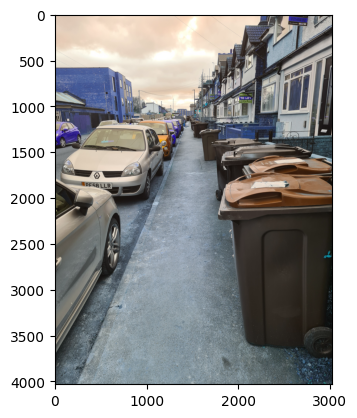

In [5]:
rotate_image = cv.imread("./data/example_34.jpg")
plt.imshow(rotate_image)

In [ ]:
waste_container
cart
street light
tree
fire hydrant
bicycle
furniture
car

python main.py downloader --classes Waste_container Cart Street_light Tree Fire_hydrant Bicycle Furniture Car --type_csv validation --limit 200

In [12]:
line = "Bicycle 0.0 375.680256 56.32 433.91999999999996"
classes = {'Waste_container': 0, 'Cart': 1, 'Street_light': 2, 'Tree': 3, 'Fire_hydrant': 4, 'Bicycle': 5, 'Furniture': 6, 'Car': 7}
for class_type in classes:
    line = line.replace(class_type, str(classes.get(class_type)))
    print(line)

Bicycle 0.0 375.680256 56.32 433.91999999999996
Bicycle 0.0 375.680256 56.32 433.91999999999996
Bicycle 0.0 375.680256 56.32 433.91999999999996
Bicycle 0.0 375.680256 56.32 433.91999999999996
Bicycle 0.0 375.680256 56.32 433.91999999999996
5 0.0 375.680256 56.32 433.91999999999996
5 0.0 375.680256 56.32 433.91999999999996
5 0.0 375.680256 56.32 433.91999999999996


In [20]:
tst = {"a":"2"}
line = "1 2 test"
print(line)
line = line.replace("1 2", tst.get("a"))
print(line)

1 2 test
2 test


In [22]:
import re

In [33]:
classes = {'Street light':"1", 'Cart':"2", 'Car':"3", "Bicycle": "4"}
line = "Bicycle 490.24 351.75114700000006 768.64 629.180283"
pattern = "([^\W\d]+)"
x = re.findall(pattern, line)
if len(x) > 1:
    x = ' '.join(x)
else:
    x = x[0]
x
line = line.replace(x, classes[x])
line

'4 490.24 351.75114700000006 768.64 629.180283'

In [36]:
16000 * 0.9

14400.0

In [ ]:
darknet.exe detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137